# Sensitivity Study of Subsurface Snow Temperatures at Summit Station, Greenland

- **Note that the more complex simulations are at the top of this document; simple, initial simulations are at the bottom.**

- Simulations were run using code supplied by Mike Town, which he derived from original finite-volume code developed from Ed Waddington, UW.

- Von P. Walden, Washington State University

## Sections

- [High-density layer over low-density layer](#high_density_over_low_density)

- [Actual 2019 Surface Skin Temperatures and Snow Densities](#actual_2019_measurements)

- [Sensitivity to melt layers](#sensitivity_to_melt_layers)

- [Effect of vertical resolution](#effect_of_vertical_resolution)

- [Effect of snow density](#effect_of_snow_density)

In [9]:
from mat4py import loadmat

In [10]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [11]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

#### Convert the Matlab mat files to xarray datasets

In [12]:
def mat2xarray(case):
    # ....Dates
    jday  = np.array(case['jday']).flatten()
    dates = pd.to_datetime(pd.Timestamp(2018,12,31).to_julian_date() + jday, unit='D', origin='julian')
    # ....Depth in snow
    Lz    = np.array(case['Lz']).flatten()
    # ....Snow density
    rho   = np.interp(Lz, np.array(case['z_vpw']).flatten(), np.array(case['rho_vpw']).flatten())
    # ....Snow temperature array
    phi1  = np.array(case['phi1'])[1:, 1:]
    
    ds = xr.Dataset({'snow temperature': (['depth', 'date'], phi1), 'snow density': (['depth'], rho)}, coords={'depth': -Lz, 'date': dates})
    return ds

#### Functions to plot single cases (simulations) and differences of cases.

In [13]:
def plot_case(ds, btime, etime, depth=-2):
    fig = plt.figure(figsize=(26,10))
    gs = GridSpec(nrows=1, ncols=2)
    
    ax1 = fig.add_axes([0.1, 0.1, 0.05, 0.9])
    ds['snow density'].plot(y='depth', ylim=[depth, 0])
    
    ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.9])
    ax2.axes.set_yticklabels([])
    cf1=ds['snow temperature'].sel(date=slice(btime,etime)).plot.contour(levels=np.arange(-20,2,1), cmap='k', linewidths=0.5, ylim=[depth, 0])
    ax2.clabel(cf1, cf1.levels[::2], inline=True, fontsize=10, fmt='%1.0f')
    ds['snow temperature'].sel(date=slice(btime,etime)).plot.contourf(levels=np.arange(-20,2,0.5), cmap='Blues_r', ylim=[depth, 0])
    ax2.axes.set_ylabel('')
    plt.grid()
    
    return

def plot_case_diff(data2, data1, btime, etime, Tmin=-10, Tmax=10, dT=0.5, depth=-2):
    # !! Note that the reference case is listed as the second input; ds2 - ds1 !!
    fig = plt.figure(figsize=(26,10))
    gs = GridSpec(nrows=1, ncols=2)
    
    ax1 = fig.add_axes([0.1, 0.1, 0.05, 0.9])
    data1['snow density'].plot(y='depth', ylim=[depth, 0])
    data2['snow density'].plot(y='depth', ylim=[depth, 0])
    
    ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.9])
    ax2.axes.set_yticklabels([])
    cf1=(data2['snow temperature']-data1['snow temperature']).sel(date=slice(btime,etime)).plot.contour(levels=np.arange(Tmin,Tmax+0.5,1), cmap='k', linewidths=0.5, ylim=[depth, 0])
    ax2.clabel(cf1, inline=True, fontsize=10, fmt='%1.0f')
    (data2['snow temperature']-data1['snow temperature']).sel(date=slice(btime,etime)).plot.contourf(levels=np.arange(Tmin,Tmax+0.5,dT), cmap='RdBu_r', ylim=[depth, 0])
    ax2.axes.set_ylabel('')
    plt.grid()
    
    return

#### Read in all of the simulations and convert them to xarray datasets

In [14]:
ds1 = mat2xarray(loadmat('/Users/vonw/data/summit/MeltEvents2019/output/case1.mat'))
ds2 = mat2xarray(loadmat('/Users/vonw/data/summit/MeltEvents2019/output/case2.mat'))
ds3 = mat2xarray(loadmat('/Users/vonw/data/summit/MeltEvents2019/output/case3.mat'))
ds4 = mat2xarray(loadmat('/Users/vonw/data/summit/MeltEvents2019/output/case4.mat'))
ds5 = mat2xarray(loadmat('/Users/vonw/data/summit/MeltEvents2019/output/case5.mat'))
ds6 = mat2xarray(loadmat('/Users/vonw/data/summit/MeltEvents2019/output/case6.mat'))
ds7 = mat2xarray(loadmat('/Users/vonw/data/summit/MeltEvents2019/output/case7.mat'))
ds8 = mat2xarray(loadmat('/Users/vonw/data/summit/MeltEvents2019/output/case8.mat'))

---

<a id="high_density_over_low_density"></a>
# High-density layer over low-density layer

This difference plot shows the effect of a high-density snow layer (melt layer) over a low-density layer. This is the case requested by Chris and Bill.

- It shows that this situation is effective at conducting the temperature pulse at the depth of the melt layer.

- However, it shows the possibility that a bit of the "temperature pulse" is conducted back to the surface, although not much.

- It also shows that the melt layer is colder than the case with no melt layer just after the melt event; blue contours center at 25 July or so.

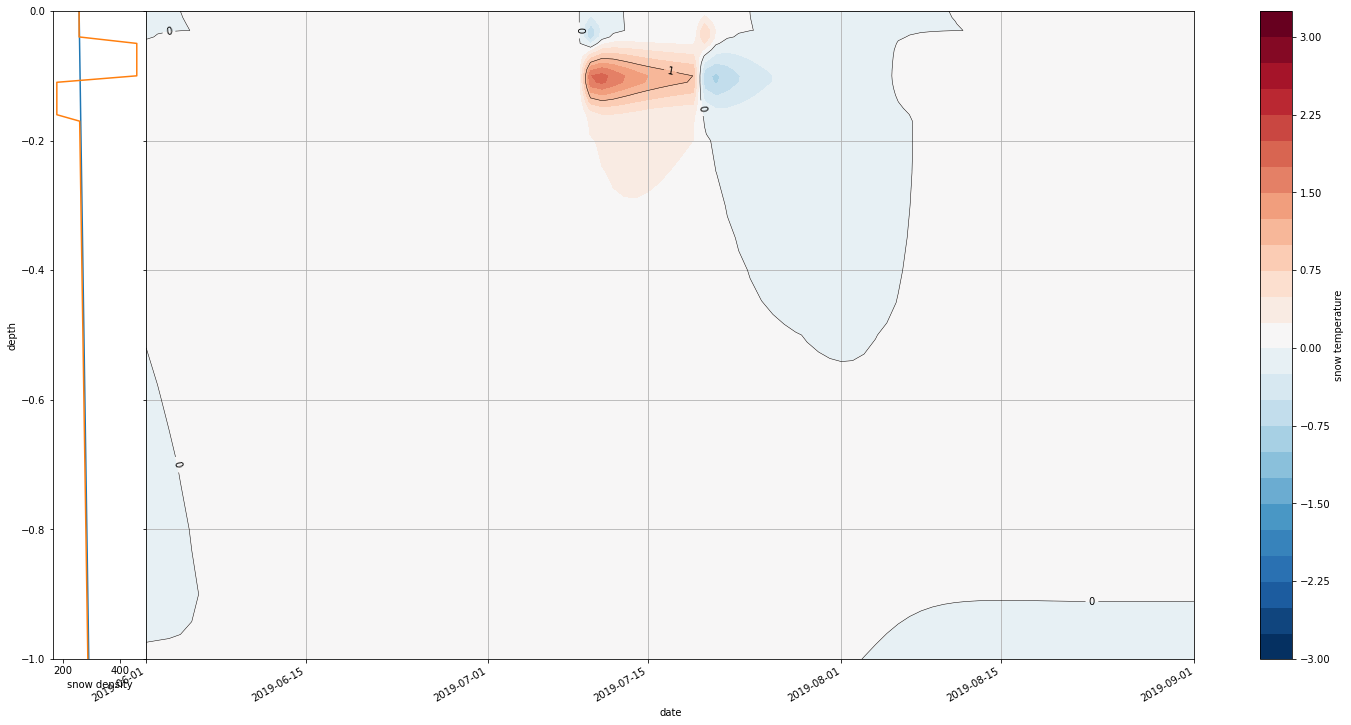

In [16]:
plot_case_diff(ds8, ds7, depth=-1, Tmin=-3, Tmax=3, dT=0.25, btime=ds3.date[0], etime=ds3.date[-1])

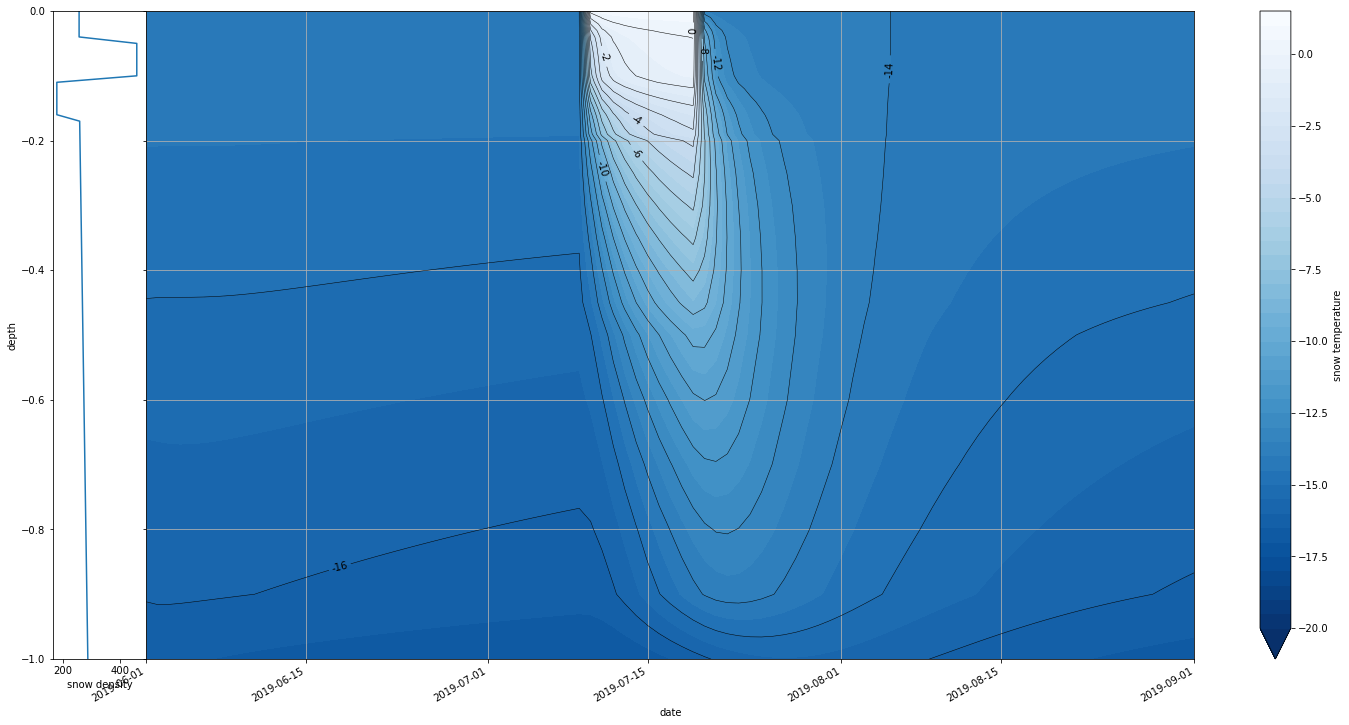

In [17]:
plot_case(ds8, depth=-1, btime=ds3.date[0], etime=ds3.date[-1])

---

<a id="actual_2019_measurements"></a>
# Actual 2019 Surface Skin Temperatures and Snow Densities

#### Actual surface snow skin temperatures (from KT15; 3-hourly average) and snow densities from Sept snow pit from Summer 2019

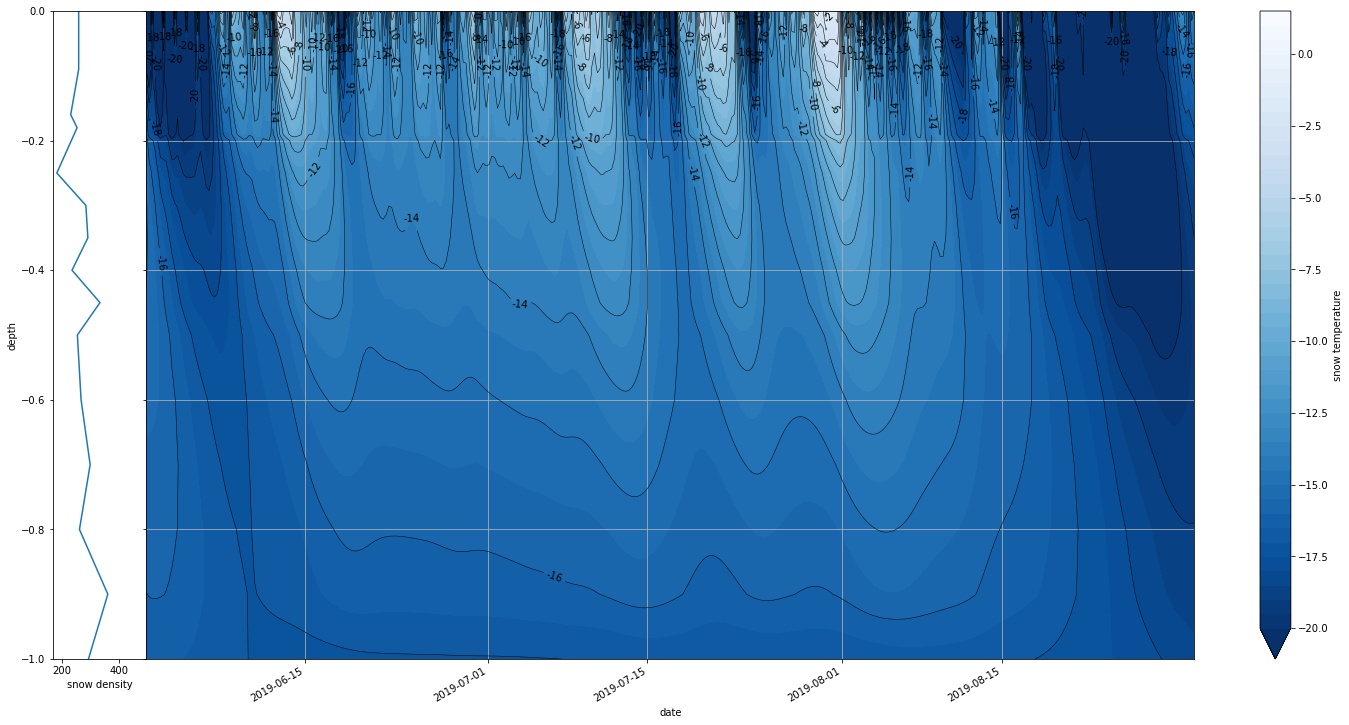

In [18]:
plot_case(ds6, depth=-1, btime=ds6.date[0], etime=ds6.date[-1])

---

<a id="sensitivity_to_melt_layers"></a>
# Sensitivity to Melt Layers

These difference plots show the effect of a melt layer in the top of the snow pack. Two cases are shown:

1. 10-cm thick layer with snow density of 460 kg m-3 (high the density of solid ice)

2. 10-cm thick layer with snow density of 920 kg m-3 (density of solid ice)

These cases are unrealistic at least for Summit Station, because the melt layer is very thick (10 cm). But the difference plots show how the relative high density layers conduct temperature into the snow pack. Note that the "temperature pulse" conducts deep into the snow pack over the course of a couple of weeks, but doesn't conduct back to the surface (very small difference in temperature just after the 10-day melt event stops).

The two different "difference plots" show that the snow density of the melt layer is quite important in determining the magnitude of the "temperature pulse" and the depth that it reaches. The upper difference plot is a bit more realistic because the density is 460 kg m-3. The lower "difference plot" has a pure ice layer (920 kg m-3), which is too large when compared with the density of the actual melt layers observed in 2019.

I'm not sure about this... But can the temperature of the snow pack and the difference between the cases be used to estimate how much flux is "captured" by the snow??? If so, the calculation below shows that a 3K difference in a snow pack at -2.5 K captures about 13.5 W m-2 during this event.

In [635]:
# Use max temperature difference to estimate the difference in flux in snow pack
T = -2.5 + 273.15                          # Kelvin
dT = 3.                                    # Kelvin
dF = 4 * 5.67e-8 * T**3 * dT               # W m-2  
print('Max flux difference is: ', dF, ' W m-2')

Max flux difference is:  13.489268498744845  W m-2


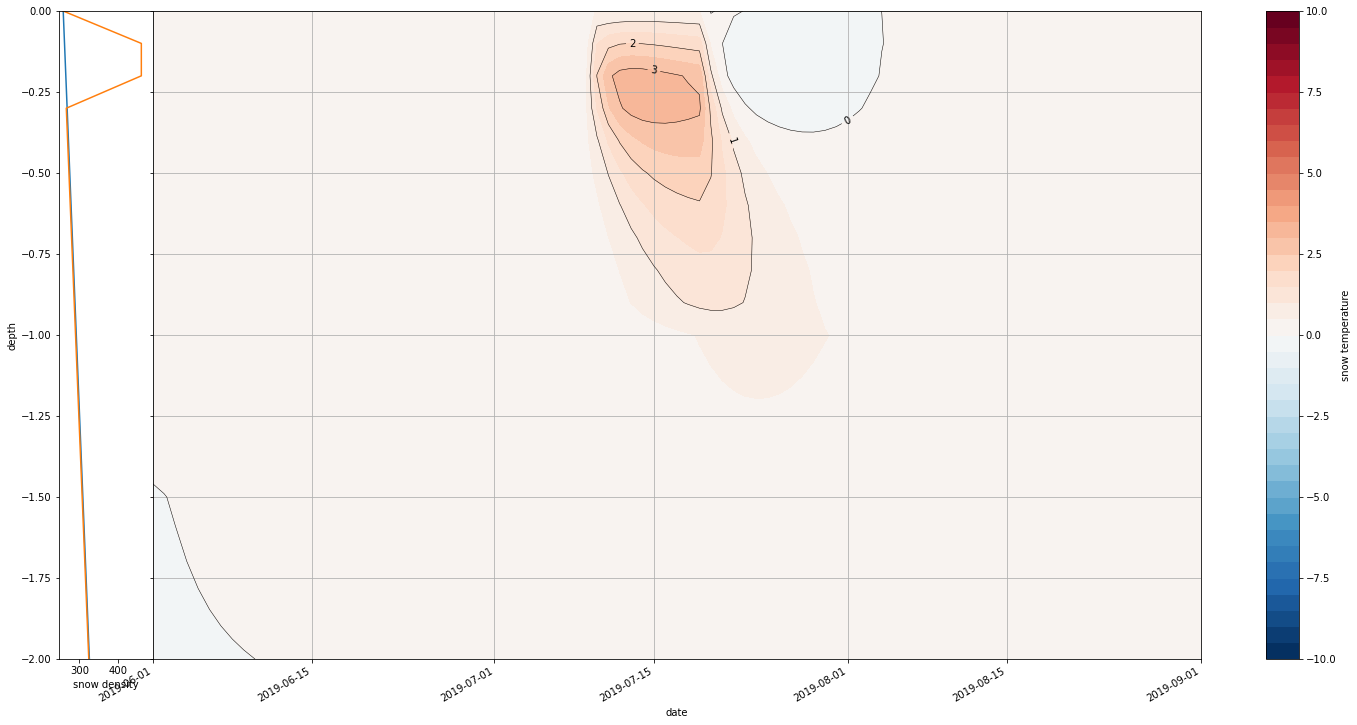

In [624]:
plot_case_diff(ds5, ds3, btime=ds3.date[0], etime=ds3.date[-1])

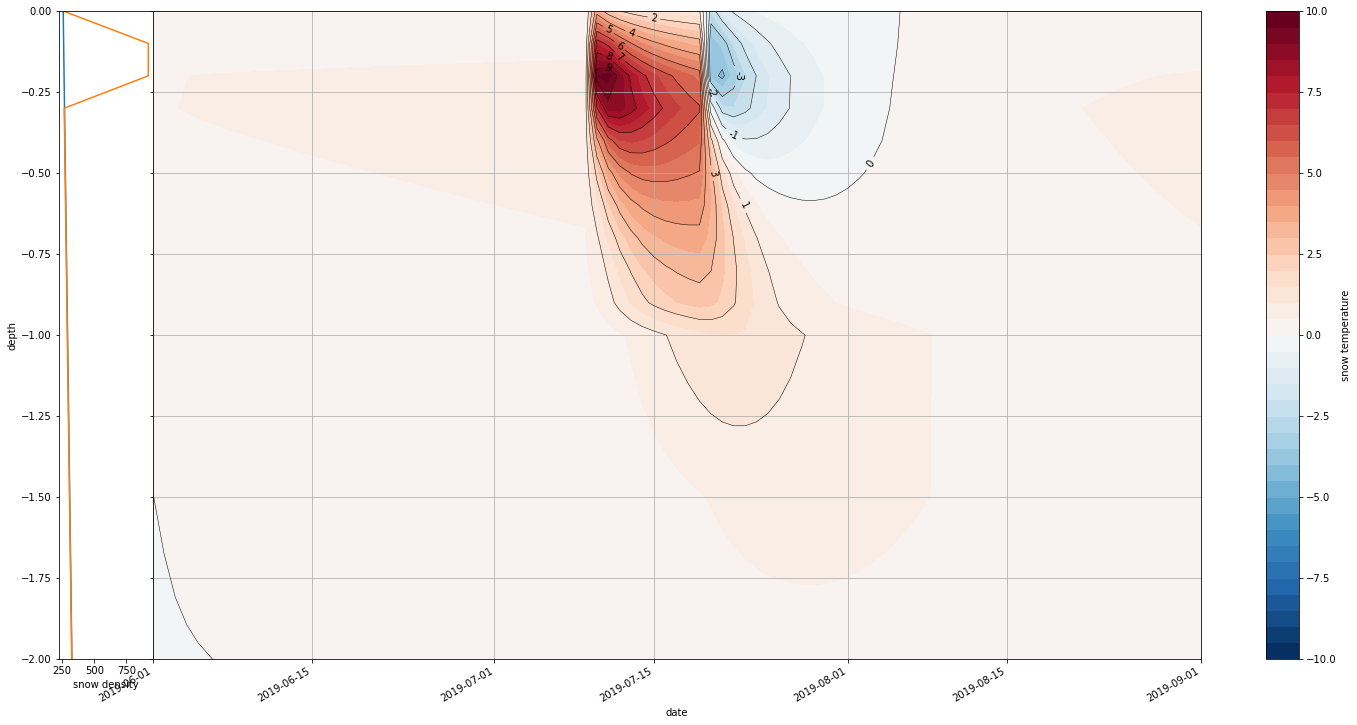

In [622]:
plot_case_diff(ds4, ds3, btime=ds3.date[0], etime=ds3.date[-1])

#### Linear Density Profile (260 to 476 kg m-3), 10-day melt event

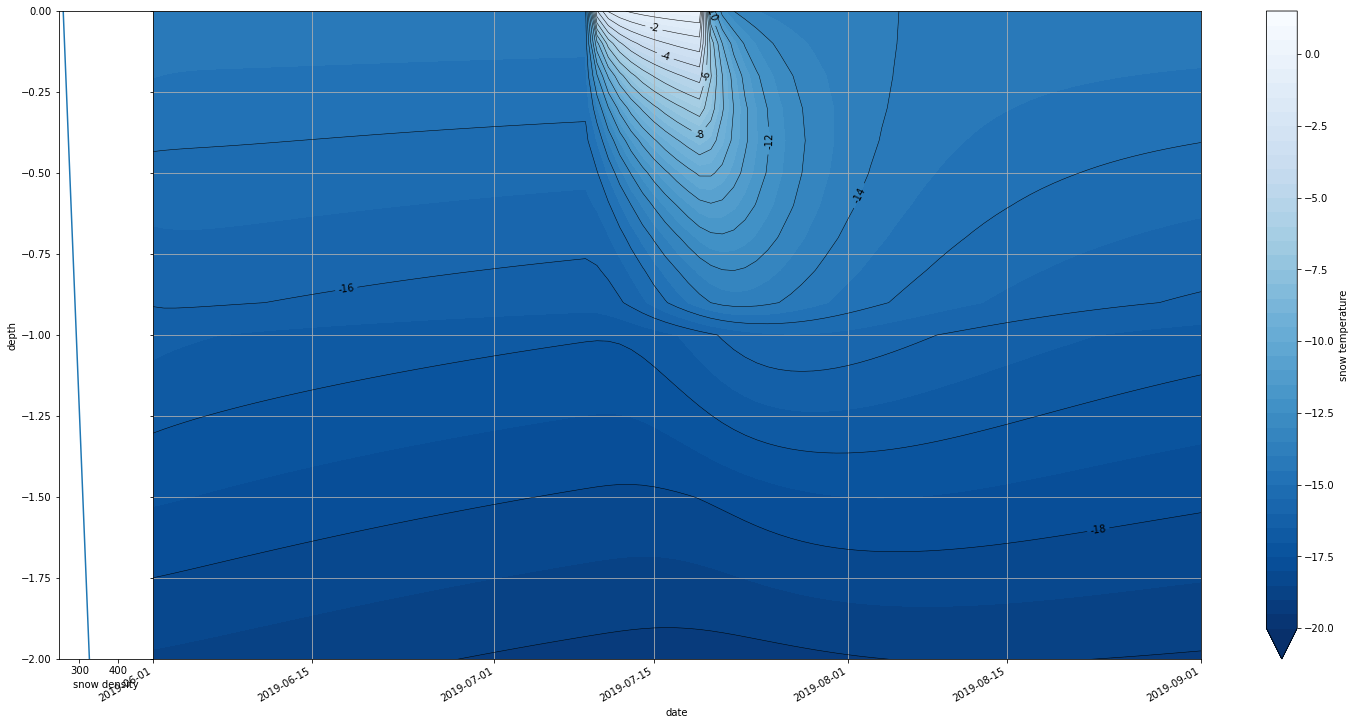

In [620]:
plot_case(ds3, btime=ds3.date[0], etime=ds3.date[-1])

#### Linear Density Profile, but with thick, HIGH-density ice layer (920 kg m-3; 10-20 cm), 10-day melt event

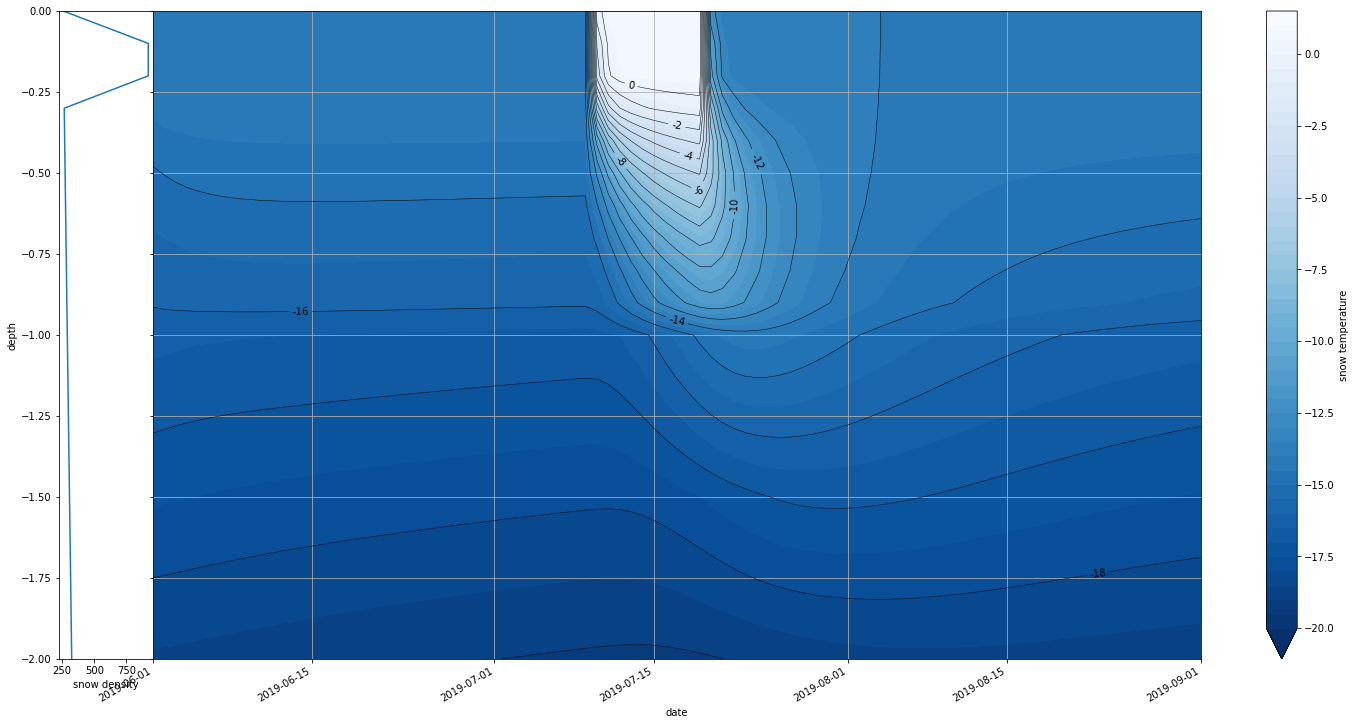

In [621]:
plot_case(ds4, btime=ds4.date[0], etime=ds4.date[-1])

#### Linear Density Profile, but with thick, MODERATE-density ice layer (460 kg m-3; 10-20 cm), 10-day melt event

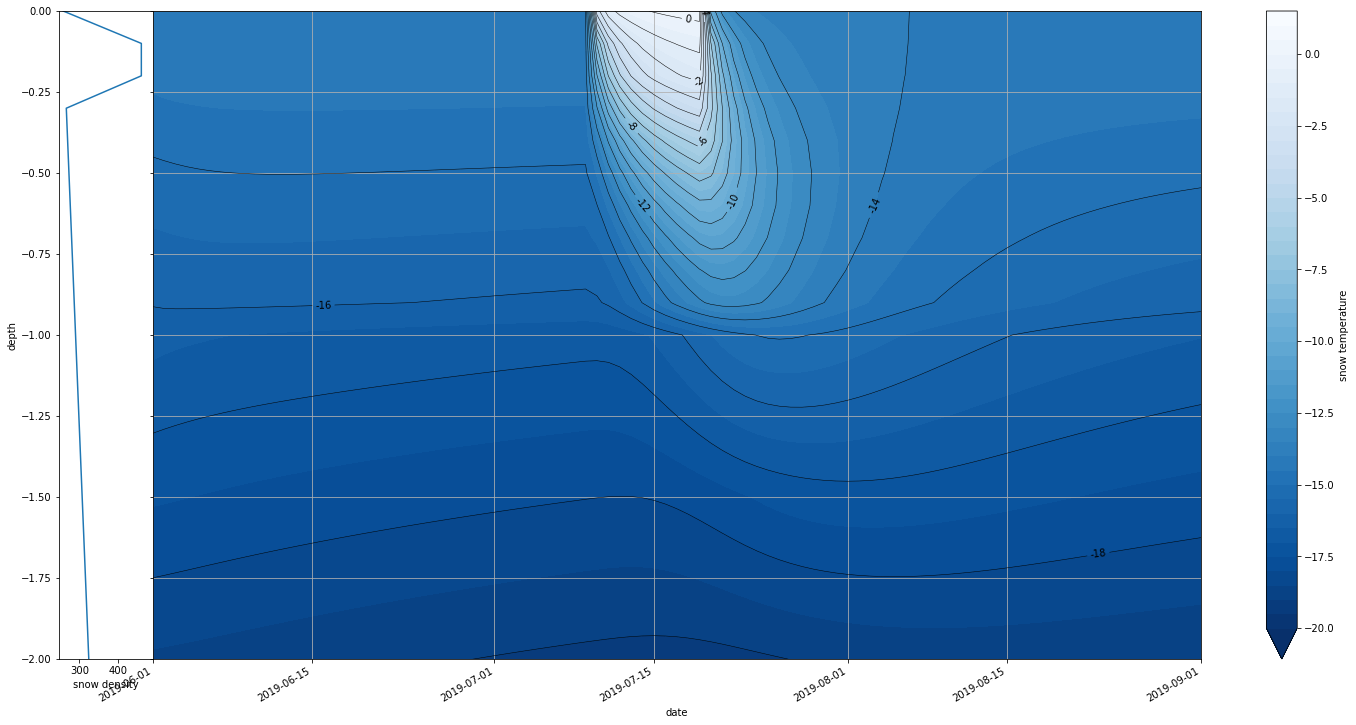

In [623]:
plot_case(ds5, btime=ds5.date[0], etime=ds5.date[-1])

---

<a id="effect_of_vertical_resolution"></a>
# Effect of Vertical Resolution

The vertical resolution used by Town et al (2008) was:

- 10 cm from 0 to 1 meter
- 50 cm from 1.5 to 6.5 meters

Melt events at Summit Station create vertical structure in the snow pack that is not resolved by 10 cm resolution in the finite-volume model. So we used the following vertical resolution:

- 1 cm from 0 to 0.2 meters
- 2.5 cm from 2.5 to 0.5 meters
- 10 cm from 0.6 to 1 meter
- 50 cm from 1.5 to 6.5 meters

So this vertical structure is the same as Town et al (2008) between 0.6 and 6.5 meters, but much finer near the surface.

The plot below shows the difference in vertical resolution only. Both cases use the same snow density profile; linear increase with depth from 260 kg m-3 at the surface to 476 kg m-3 at 6.5 meters.

The largest differences occur in the upper 10 cm, at times just after large changes in the surface skin temperature.

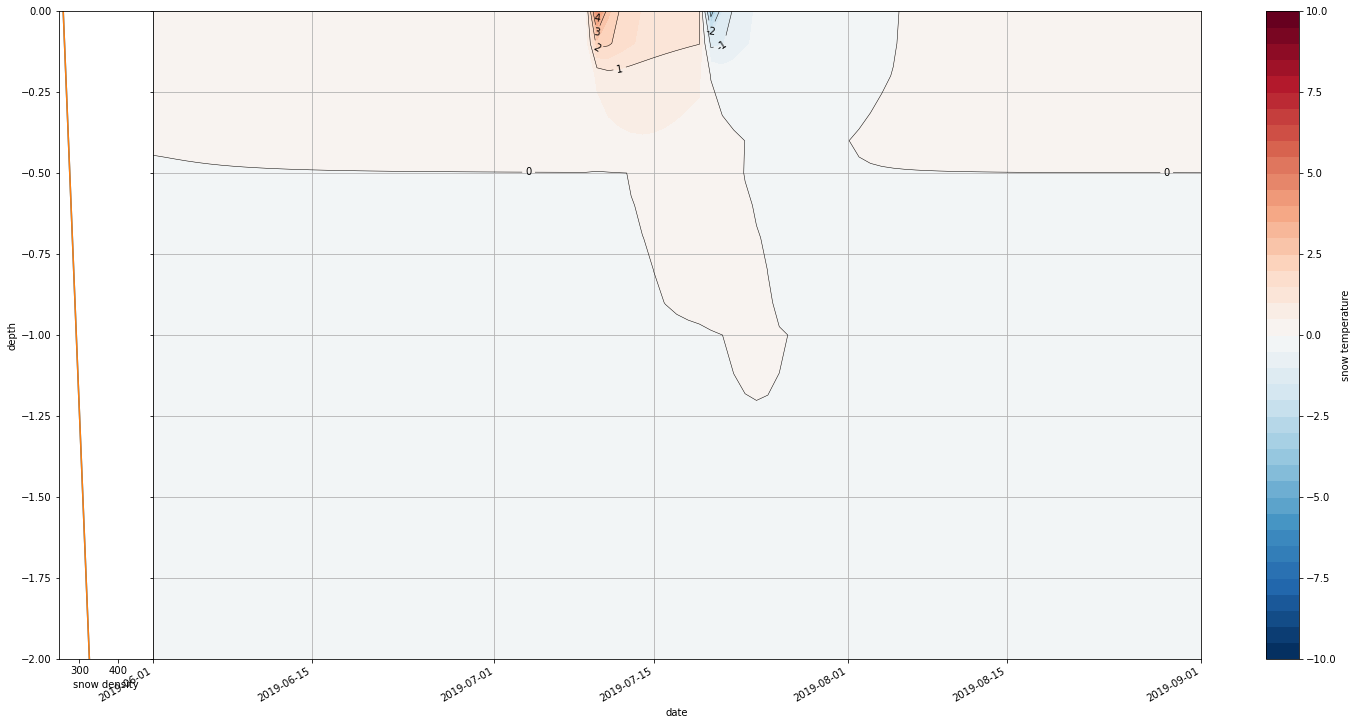

In [645]:
plot_case_diff(ds7, ds3, btime=ds3.date[0], etime=ds3.date[-1])

---

<a id="effect_of_snow_density"></a>
# Effect of Snow Density

This difference plot shows the importance of snow density in conducting temperature into the snow pack. A constant snow density is used for both cases; higher density (476 kg m-3) is subtracted from low-density (260 kg m-3).

**higher density = larger conduction = deeper penetration of melt event**


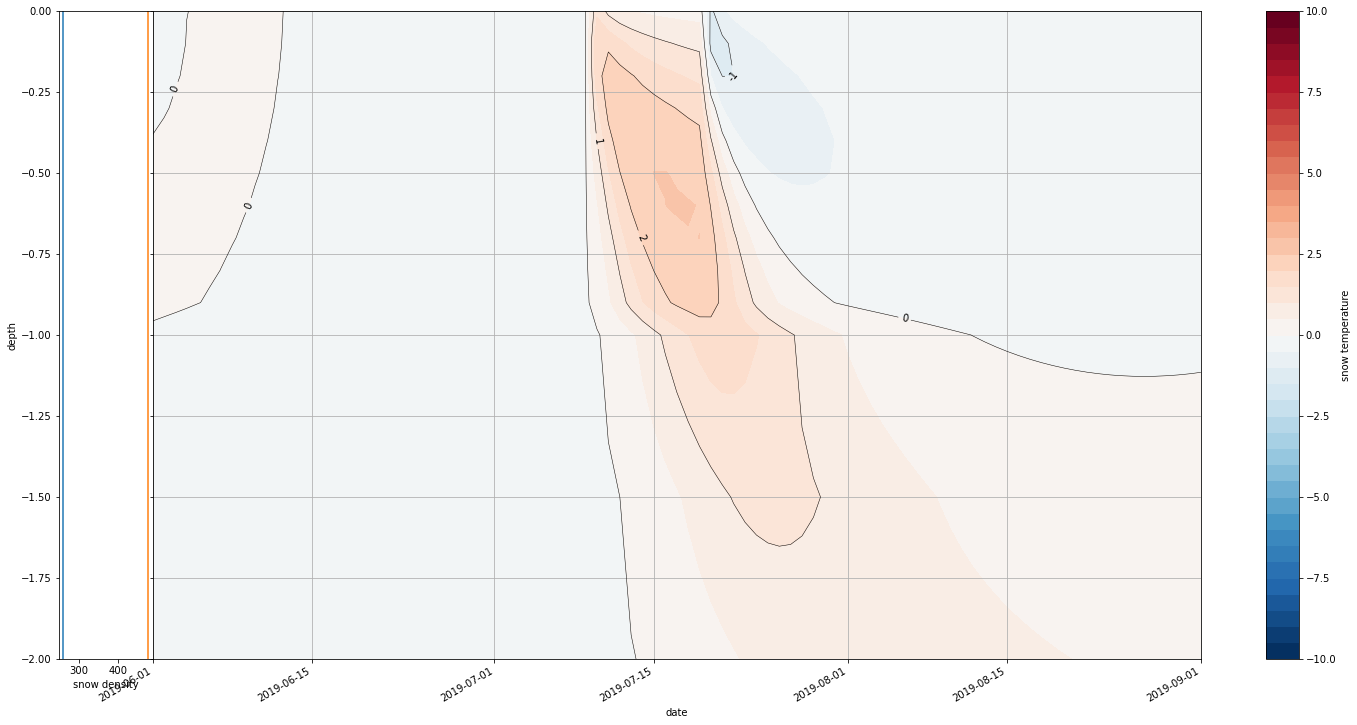

In [628]:
plot_case_diff(ds2, ds1, btime=ds1.date[0], etime=ds1.date[-1])

#### Constant Density (260 kg m-3), 10-day melt event

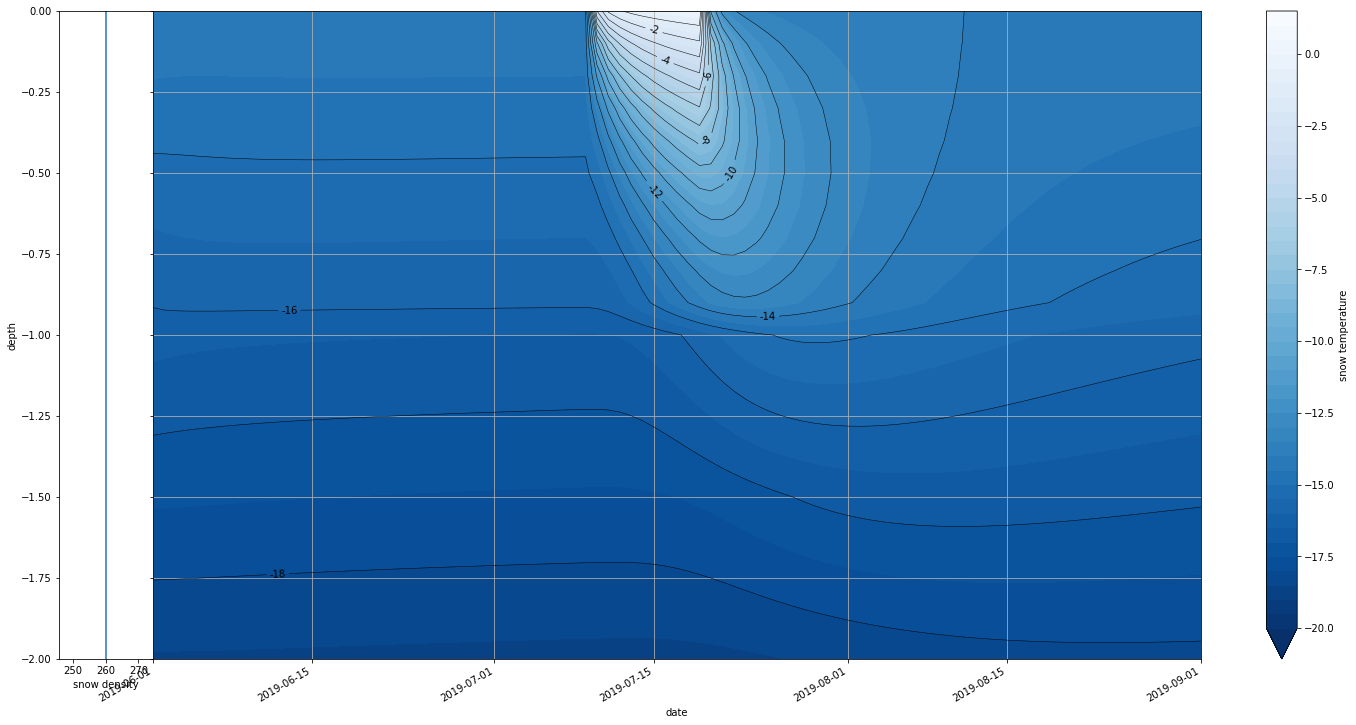

In [626]:
plot_case(ds1, btime=ds1.date[0], etime=ds1.date[-1])

#### Constant Density (476 kg m-3), 10-day melt event

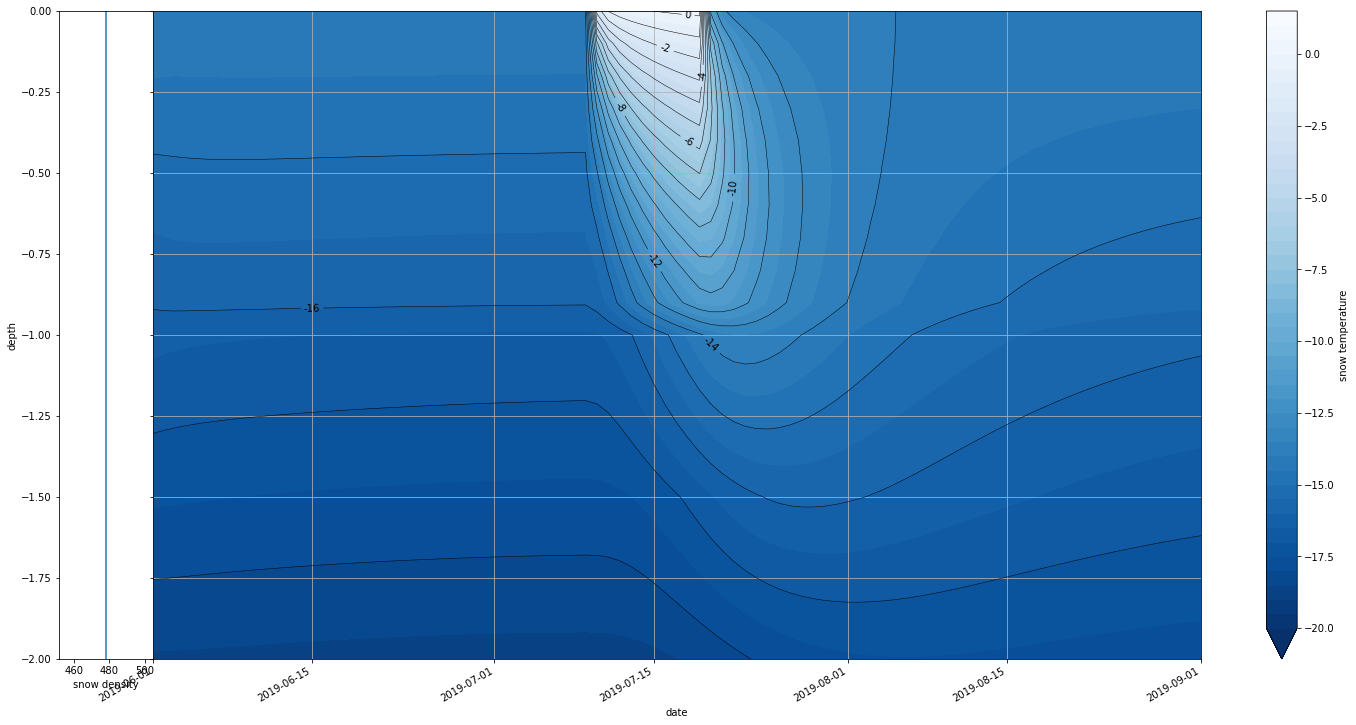

In [627]:
plot_case(ds2, btime=ds2.date[0], etime=ds2.date[-1])

---